# PROJECT OVERVIEW

* Problem
    - High relative poverty rate for the elderly
>  1. Defination of relative elderly poverty rate
>    - The percentage of seniors in the total elderly population that live on less than 50 percent of the equivalised median disposable personal income.
>    - A 2-person household who earns under 1,400,000 wons a month, for example, is classified as a relative elderly poverty in Korea, given that the equivalised median disposable income for 2 peeple was calculated about 2,800,000 wons a month in 2017.

* Research Purpose
    - To find a more profitable but safer asset allocation portfolio to overcome the high risk of being in the poverty after retirement.

In [95]:
# image
from IPython.display import Image

# data processing
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

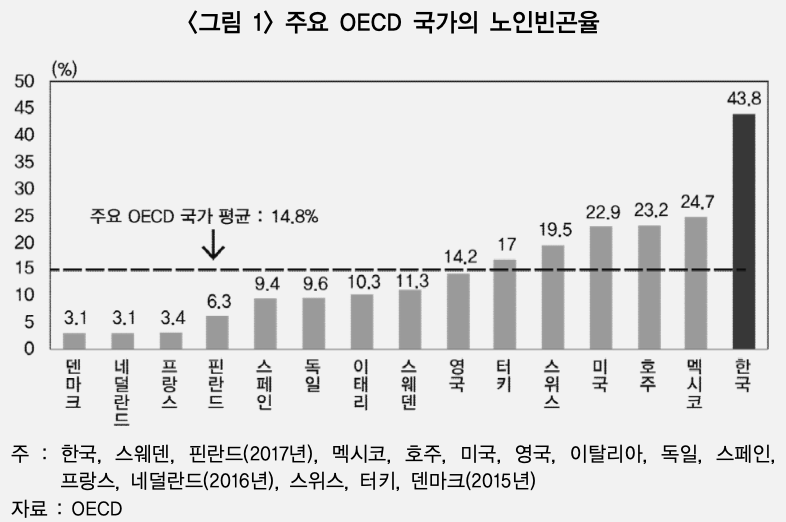

In [96]:
# define a social problem

Image("img/1.png", width=600, height=70)

# DATA PROCESSING

In [97]:
# read index data

sp_index = pd.read_csv("./data/S&P_Index.csv")
gold_index = pd.read_csv("./data/Gold_Index.csv")
commodity_index = pd.read_csv("./data/Commodity_Index.csv")
interm_index = pd.read_csv("./data/Intermediate_Term_Bond_Index.csv")
long_index = pd.read_csv("./data/Long_Term_Bond_Index.csv")

In [98]:
# weekly 'close' price

closes_df = pd.DataFrame({'Date': sp_index["Date"].copy(),
                          'SP_Close': sp_index["Close"].copy(),
                          'Long_Close': long_index["Close"].copy(),
                          'Interm_Close': interm_index["Close"].copy(),
                          'Commodity_Close': commodity_index["Close"].copy(),
                          'Gold_Close': gold_index["Close"].copy()}).round(2)

# set 'Date' columns as an index 

closes_df['Date'] = pd.to_datetime(closes_df['Date'])
closes_df = closes_df.set_index('Date', drop=True)

closes_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996-07-01,657.44,9.41,10.07,207.88,382
1996-07-08,646.19,9.58,10.18,210.44,384
1996-07-15,638.73,9.64,10.22,198.54,385
1996-07-22,635.90,9.60,10.19,193.01,386
1996-07-29,662.49,9.87,10.38,200.48,388
...,...,...,...,...,...
2020-06-01,3193.93,14.93,12.03,325.54,1683
2020-06-08,3041.31,15.51,12.12,314.28,1737
2020-06-15,3097.74,15.51,12.13,327.64,1753


In [99]:
# rate of weely return(rwr)
# : current week's return compared to return a week before

index_df = (closes_df - closes_df.shift(1)) / closes_df.shift(1)
index_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996-07-01,NaN,NaN,NaN,NaN,NaN
1996-07-08,-0.017112,0.018066,0.010924,0.012315,0.005236
1996-07-15,-0.011545,0.006263,0.003929,-0.056548,0.002604
1996-07-22,-0.004431,-0.004149,-0.002935,-0.027853,0.002597
1996-07-29,0.041815,0.028125,0.018646,0.038703,0.005181
...,...,...,...,...,...
2020-06-01,0.049147,-0.043562,-0.008244,0.060115,-0.031088
2020-06-08,-0.047784,0.038848,0.007481,-0.034589,0.032086
2020-06-15,0.018555,0.000000,0.000825,0.042510,0.009211


In [100]:
# rate of cumulative return (rcr)
# : current week's return compared to return of the first week

cumul_index_df = (closes_df - closes_df.iloc[0]) / closes_df.iloc[0]
cumul_index_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996-07-01,0.000000,0.000000,0.000000,0.000000,0.000000
1996-07-08,-0.017112,0.018066,0.010924,0.012315,0.005236
1996-07-15,-0.028459,0.024442,0.014896,-0.044930,0.007853
1996-07-22,-0.032763,0.020191,0.011917,-0.071532,0.010471
1996-07-29,0.007681,0.048884,0.030785,-0.035597,0.015707
...,...,...,...,...,...
2020-06-01,3.858132,0.586610,0.194638,0.566000,3.405759
2020-06-08,3.625989,0.648247,0.203575,0.511834,3.547120
2020-06-15,3.711822,0.648247,0.204568,0.576102,3.589005


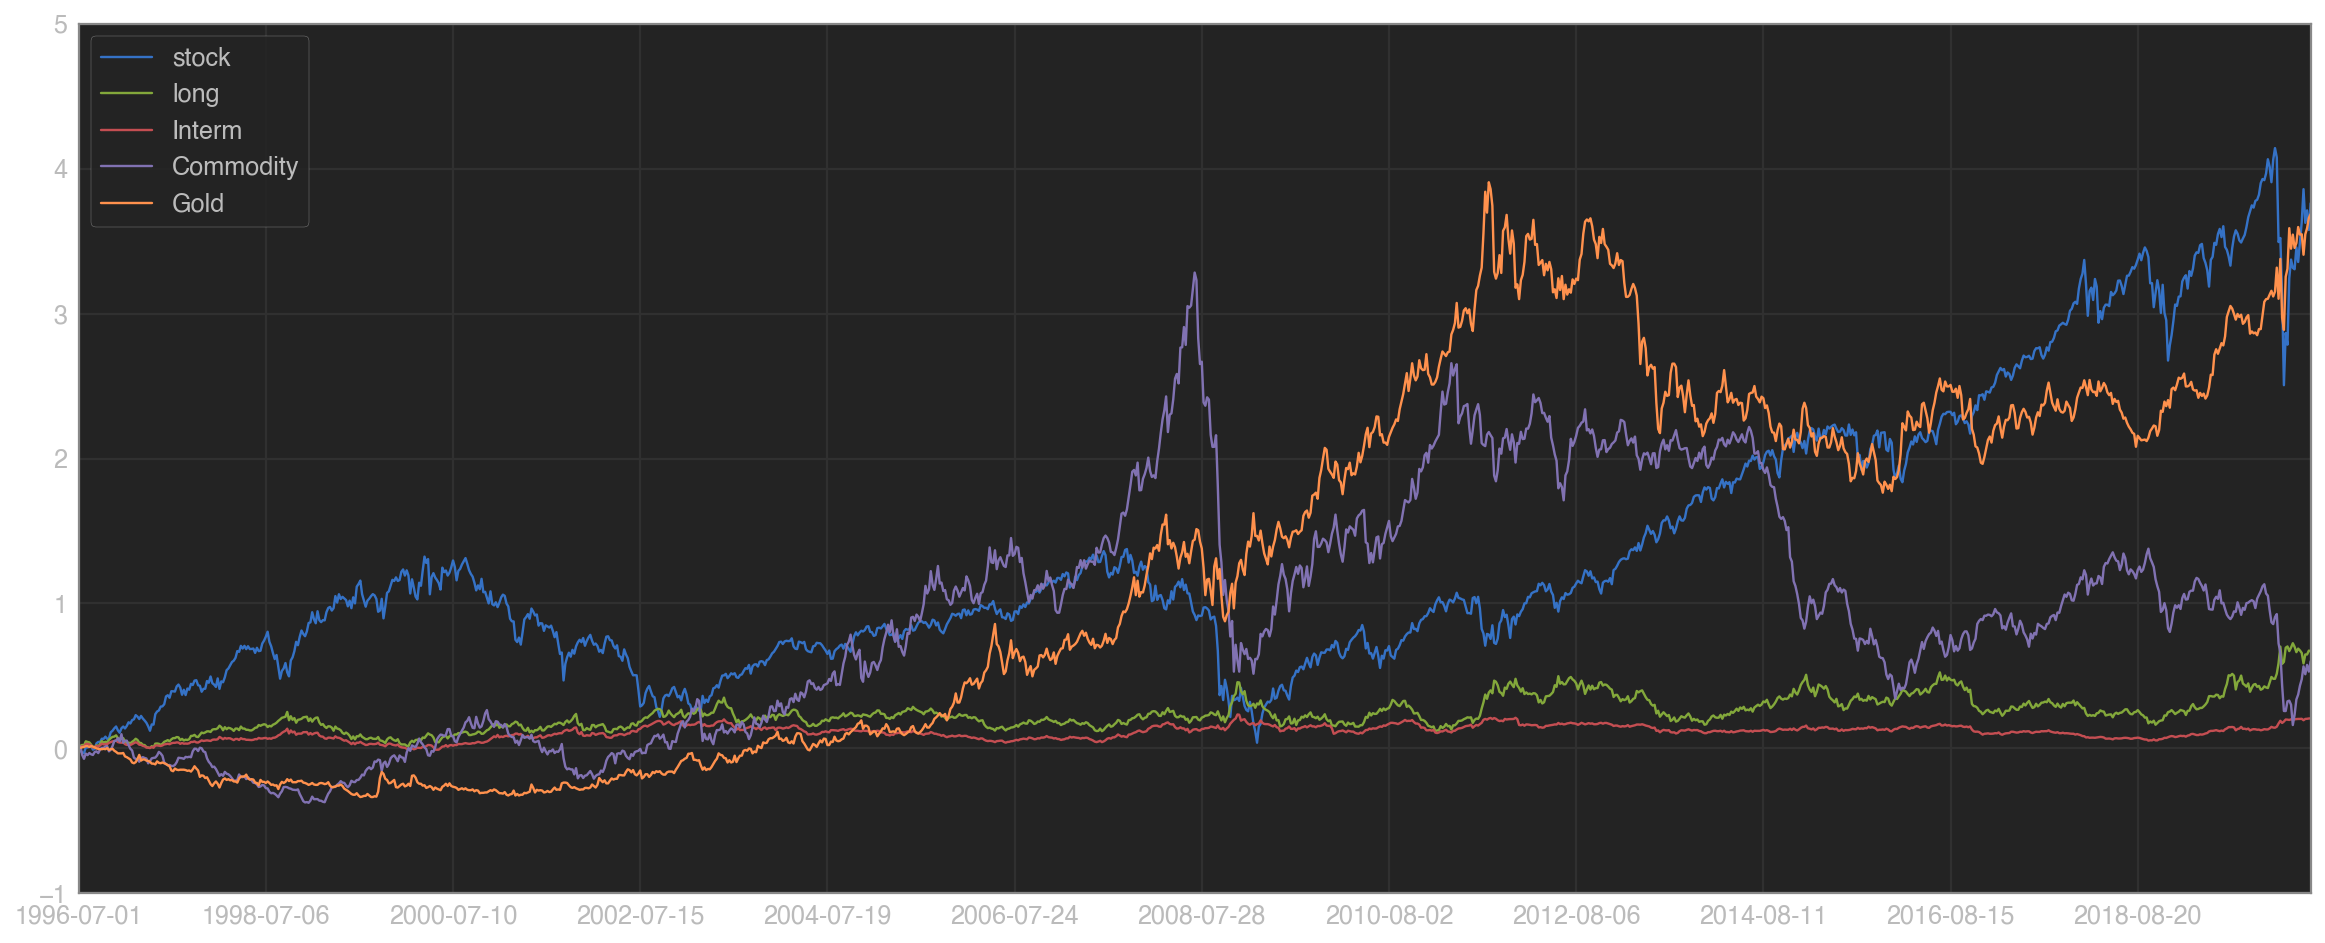

In [101]:
# comparing rcr by asset types

plt.figure(figsize=(20, 8))

plt.plot(cumul_index_df.index, cumul_index_df.SP_Close, label="stock")
plt.plot(cumul_index_df.index, cumul_index_df.Long_Close, label="long")
plt.plot(cumul_index_df.index, cumul_index_df.Interm_Close, label="Interm")
plt.plot(cumul_index_df.index, cumul_index_df.Commodity_Close, label="Commodity")
plt.plot(cumul_index_df.index, cumul_index_df.Gold_Close, label="Gold")

plt.xticks(cumul_index_df.index[::105])
plt.axis(["1996-07-01", "2020-06-29", -1, 5])

plt.grid(True)
plt.legend()
plt.show()

## PORTFOLIO
- portfolio_1 : stock 100%
- portfolio_2 : stock 60% + long-term bond 40%
- portfolio_3 : All_Weather : stock 30% + long-term bond 40% + mid-term bond 15% + commidity 7.5% + gold 7.5%

In [102]:
# asset allocation portfolio

equity_names = ["Stock", "Long_bond", "Interm_bond", "Commodity", "Gold"]

# stock 100%
stock100 = [1, 0, 0, 0, 0]
# stock 60% + long-term bond 40%
s6_b4 = [0.6, 0.4, 0, 0, 0]
# stock 30% + long-term bond 40% + mid-term bond 15% + commidity 7.5% + gold 7.5%
all_weather = [0.3, 0.4, 0.15, 0.075, 0.075]

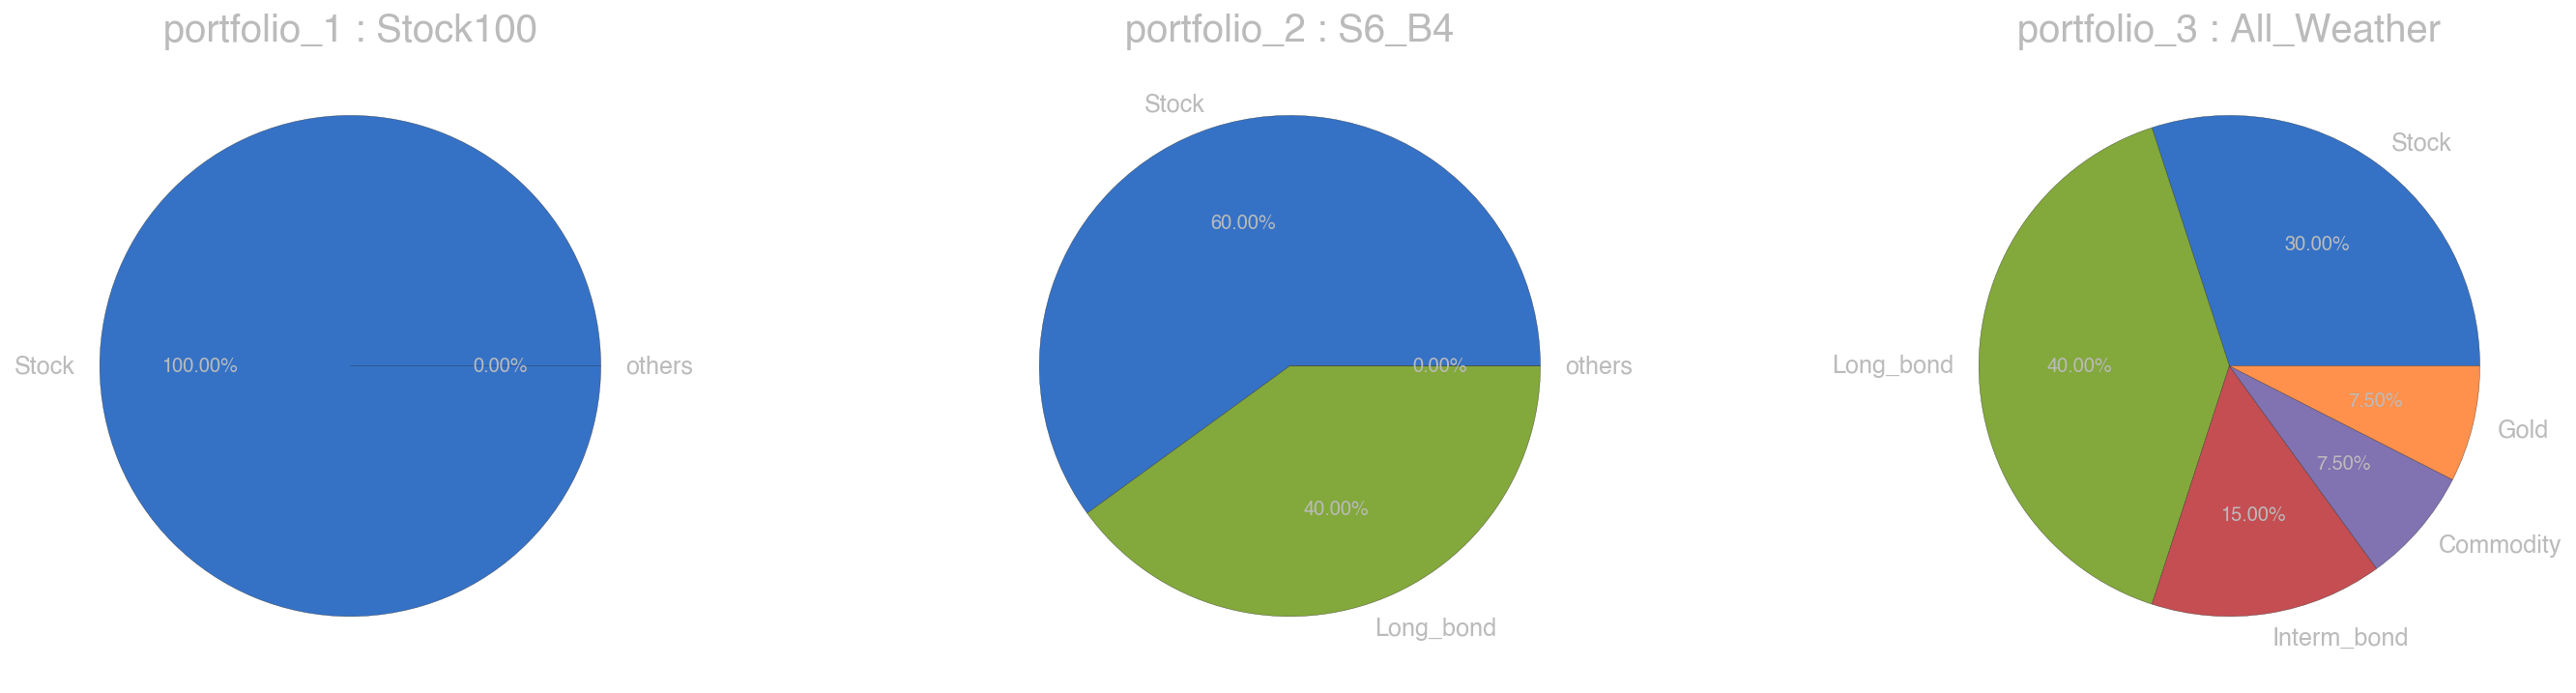

In [103]:
# pie graph for asset allocation portfolio

plt.figure(figsize=(20, 8))

# 1. stock 100%
data1 = stock100[:1] + [0]
data2 = equity_names[:1] + ["others"]

plt.subplot(131)
plt.pie(data1, labels=data2, autopct='%0.2f%%')
plt.title('portfolio_1 : Stock100', fontsize=20)

# 2. stock 60% + long-term bond 40%
data3 = s6_b4[:2] + [0]
data4 = equity_names[:2] + ["others"]

plt.subplot(132)
plt.pie(data3, labels=data4, autopct='%0.2f%%')
plt.title('portfolio_2 : S6_B4', fontsize=20)

# 3. All_Weather
plt.subplot(133)
plt.pie(all_weather, labels=equity_names, autopct='%0.2f%%')
plt.title('portfolio_3 : All_Weather', fontsize=20)

plt.subplots_adjust(top=1, bottom=0.1, left=0.1,
                    right=1, hspace=0.5, wspace=0.5)

In [104]:
# analysis about rwr by the porfolios

def get_port_return(w1, w2, w3, w4, w5):

    return (index_df * [w1, w2, w3, w4, w5]).sum(axis=1)


# portfolio_1 : Stock100
df_stock100 = pd.DataFrame({"Stock100": get_port_return(*stock100)})

# portfolio_2 : S6_B4
df_s6_b4 = pd.DataFrame({"S6_B4": get_port_return(*s6_b4)})

# portfolio_3 : All_Weather
df_all_weather = pd.DataFrame({"All_Weather": get_port_return(*all_weather)})

port_df = pd.DataFrame({"Stock100": df_stock100["Stock100"],
                        "S6_B4": df_s6_b4["S6_B4"],
                        "All_Weather": df_all_weather["All_Weather"]
                        })
port_df

,Stock100,S6_B4,All_Weather
Date,,,
1996-07-01,0.000000,0.000000,0.000000
1996-07-08,-0.017112,-0.003041,0.005048
1996-07-15,-0.011545,-0.004422,-0.004415
1996-07-22,-0.004431,-0.004318,-0.005323
1996-07-29,0.041815,0.036339,0.029883
...,...,...,...
2020-06-01,0.049147,0.012064,-0.001740
2020-06-08,-0.047784,-0.013131,0.002138
2020-06-15,0.018555,0.011133,0.009569


In [105]:
# analysis about rcr by the porfolios

def get_port_cumul_return(w1, w2, w3, w4, w5):

    return (cumul_index_df * [w1, w2, w3, w4, w5]).sum(axis=1)


df_cul_stock100 = pd.DataFrame({"Stock100": get_port_cumul_return(*stock100)})
df_cul_s6_b4 = pd.DataFrame({"S6_B4": get_port_cumul_return(*s6_b4)})
df_cul_all_weather = pd.DataFrame(
    {"All_Weather": get_port_cumul_return(*all_weather)})

port_cul_df = pd.DataFrame({"Stock100": df_cul_stock100["Stock100"],
                            "S6_B4": df_cul_s6_b4["S6_B4"],
                            "All_Weather": df_cul_all_weather["All_Weather"]
                            })

port_cul_df

,Stock100,S6_B4,All_Weather
Date,,,
1996-07-01,0.000000,0.000000,0.000000
1996-07-08,-0.017112,-0.003041,0.005048
1996-07-15,-0.028459,-0.007298,0.000693
1996-07-22,-0.032763,-0.011582,-0.004545
1996-07-29,0.007681,0.024162,0.024984
...,...,...,...
2020-06-01,3.858132,2.549523,1.719161
2020-06-08,3.625989,2.434892,1.682053
2020-06-15,3.711822,2.486392,1.715913


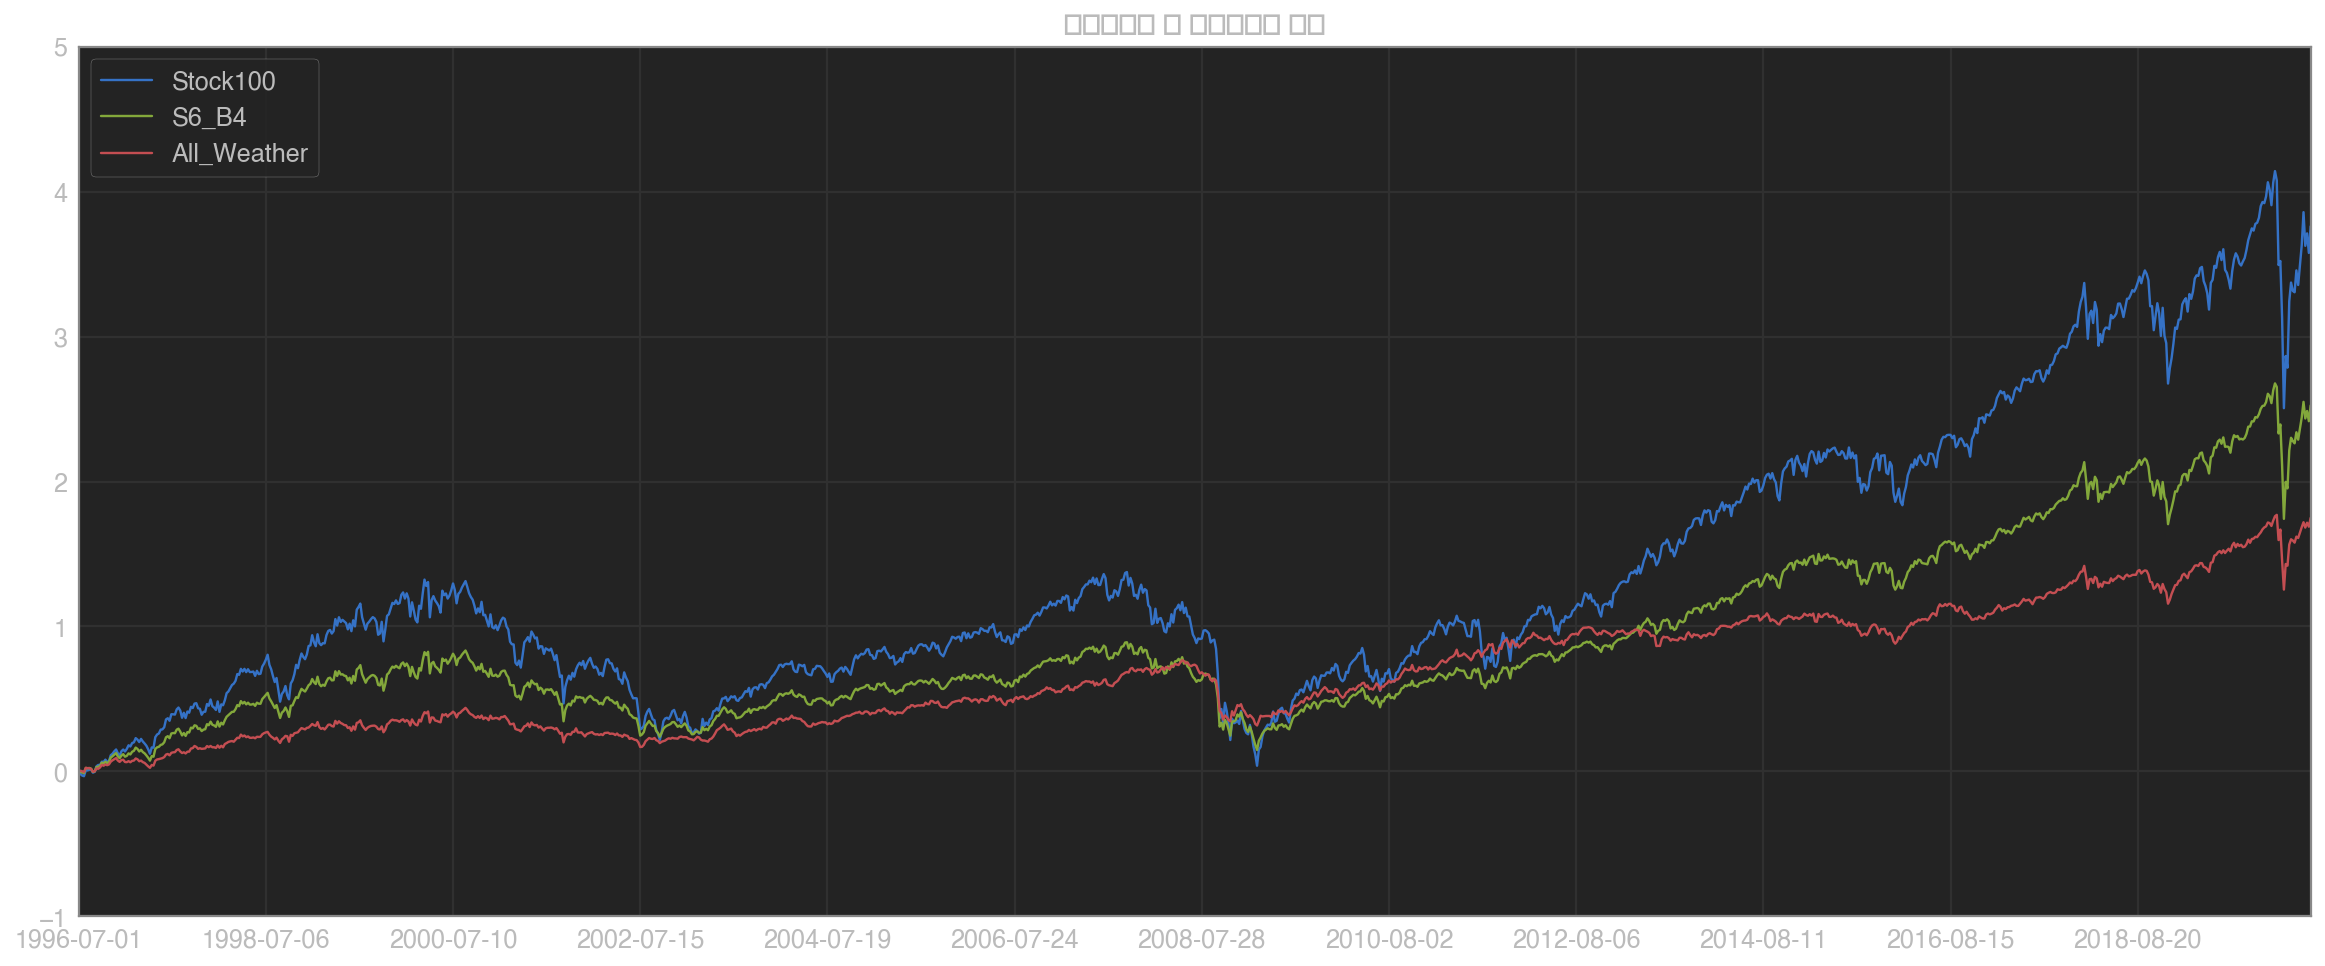

In [106]:
# trend analysis about rcr by the porfolios

plt.figure(figsize=(20, 8))

plt.plot(port_cul_df.index, port_cul_df.Stock100, label="Stock100")
plt.plot(port_cul_df.index, port_cul_df.S6_B4, label="S6_B4")
plt.plot(port_cul_df.index, port_cul_df.All_Weather, label="All_Weather")

plt.xticks(cumul_index_df.index[::105])
plt.axis(["1996-07-01", "2020-06-29", -1, 5])

plt.title('포트폴리오 별 누적수익률 추이')
plt.grid(True)
plt.legend()
plt.show()

In [107]:
# cuml_rate (over the last 25 years)
data_cumul_rate = pd.Series({"Stock100": port_cul_df["Stock100"].loc["2020.6.29"],
                             "S6_B4": port_cul_df["S6_B4"].loc["2020.6.29"],
                             "All_Weather": port_cul_df["All_Weather"].loc["2020.6.29"]})
# the best peak of rwr
data_max = pd.Series({"Stock100": port_df["Stock100"].max(),
                      "S6_B4": port_df["S6_B4"].max(),
                      "All_Weather": port_df["All_Weather"].max()})
# the worst drop of rwr
data_min = pd.Series({"Stock100": port_df["Stock100"].min(),
                      "S6_B4": port_df["S6_B4"].min(),
                      "All_Weather": port_df["All_Weather"].min()})
# the numbers of negative(minus) rwr
data_minus_count = pd.Series({"Stock100": (port_df["Stock100"] < 0).sum(),
                              "S6_B4": (port_df["S6_B4"] < 0).sum(),
                              "All_Weather": (port_df["All_Weather"] < 0).sum()})

summary_port_df = pd.DataFrame({"cuml_rate": data_cumul_rate,
                                "highest peak": data_max,
                                "worst drop": data_min,
                                "numbers of negative": data_minus_count
                                })
summary_port_df

,cuml_rate,highest peak,worst drop,numbers of negative
Stock100,3.760906,0.121017,-0.181955,548
S6_B4,2.524769,0.086061,-0.120002,561
All_Weather,1.749160,0.064088,-0.076482,550


**BACKTEST RESULT**

> - All_weather portfolio doesn't seem to be the best portfolio to invest since the rate of cumulative return is 170% over the last 25 years even though it's safer than any others. 
> - Therefore, we think that it would be valuable to build a new portfolio that is able to make more returns as maintaining the safeness of All_Weather portfolio.

##  NEW ALL WEATHER PORTFOLIO
- increasing the weight of the assets which are more correlated with SP_500(stock) 

<AxesSubplot:>

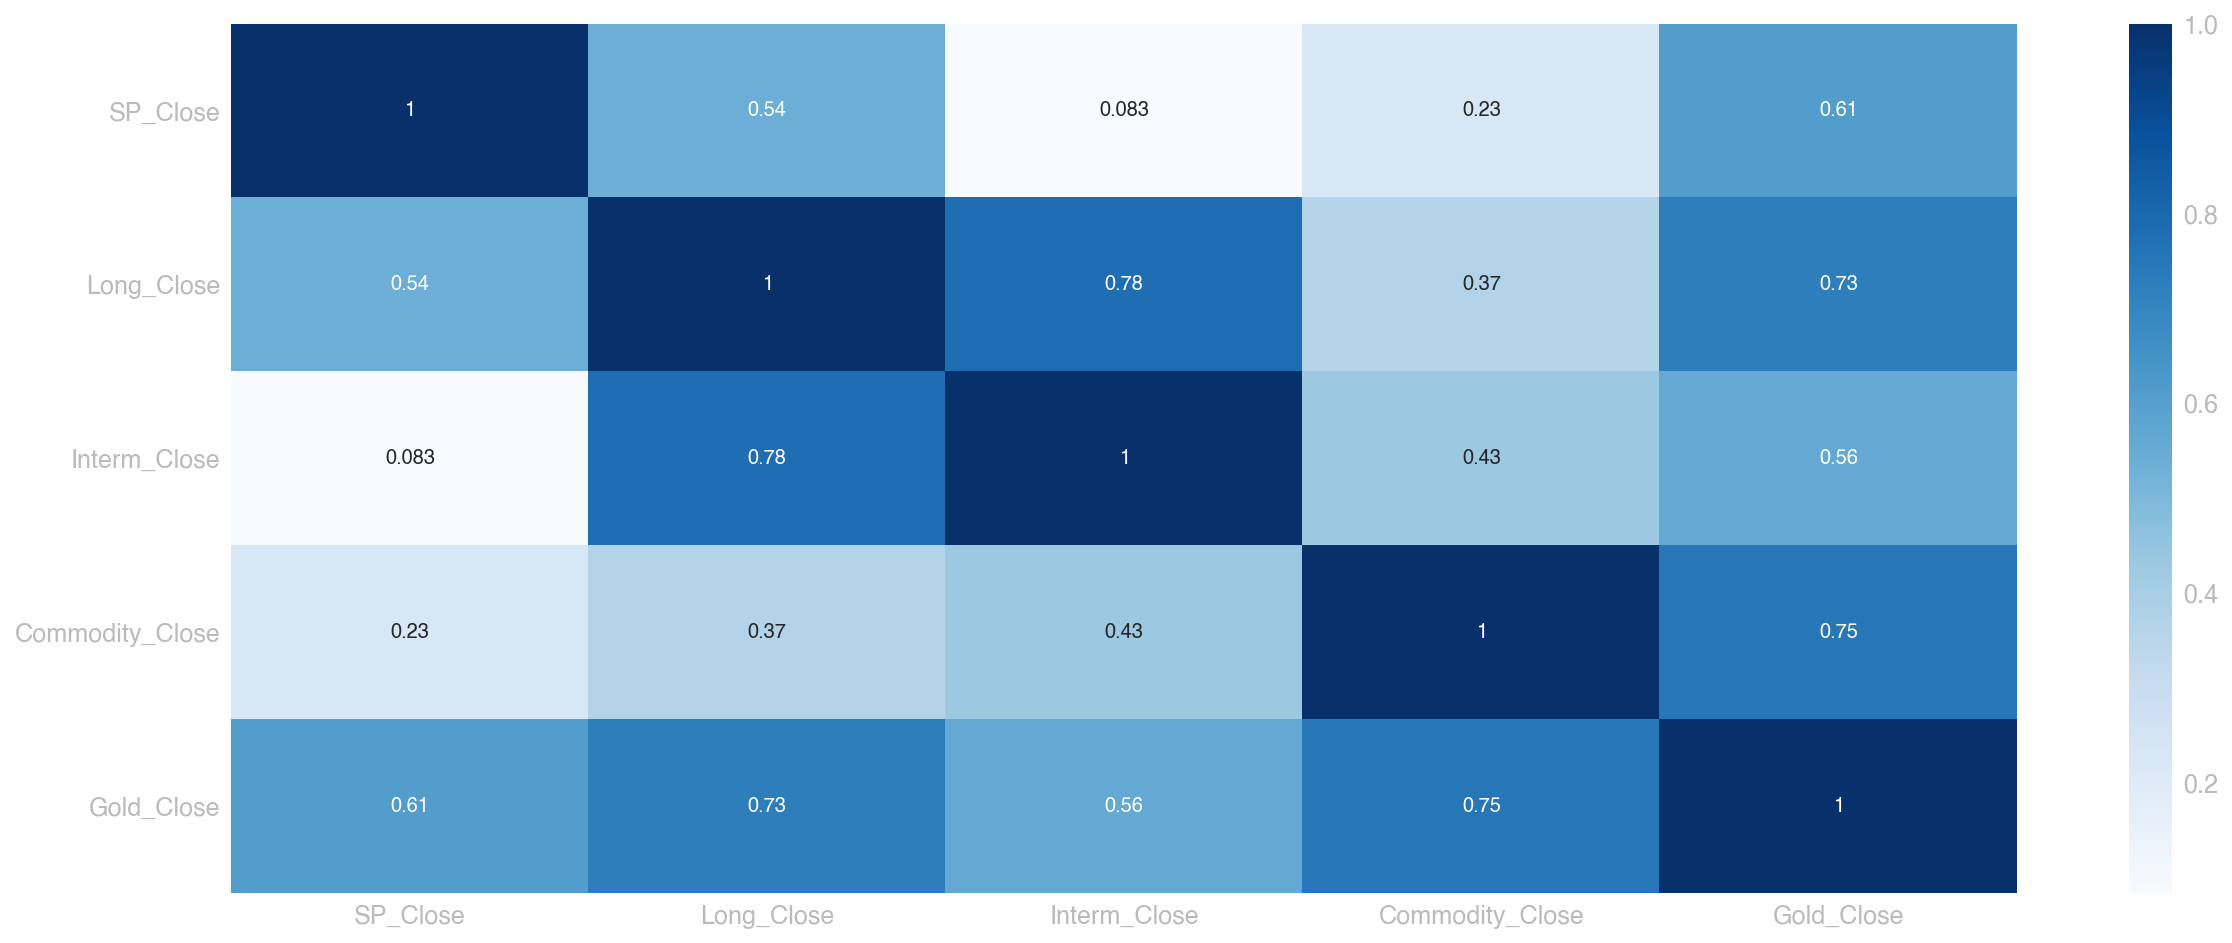

In [108]:
# analyze the correlation

plt.figure(figsize=(20, 8))
sns.heatmap(data=cumul_index_df.corr(), annot=True, cmap="Blues")

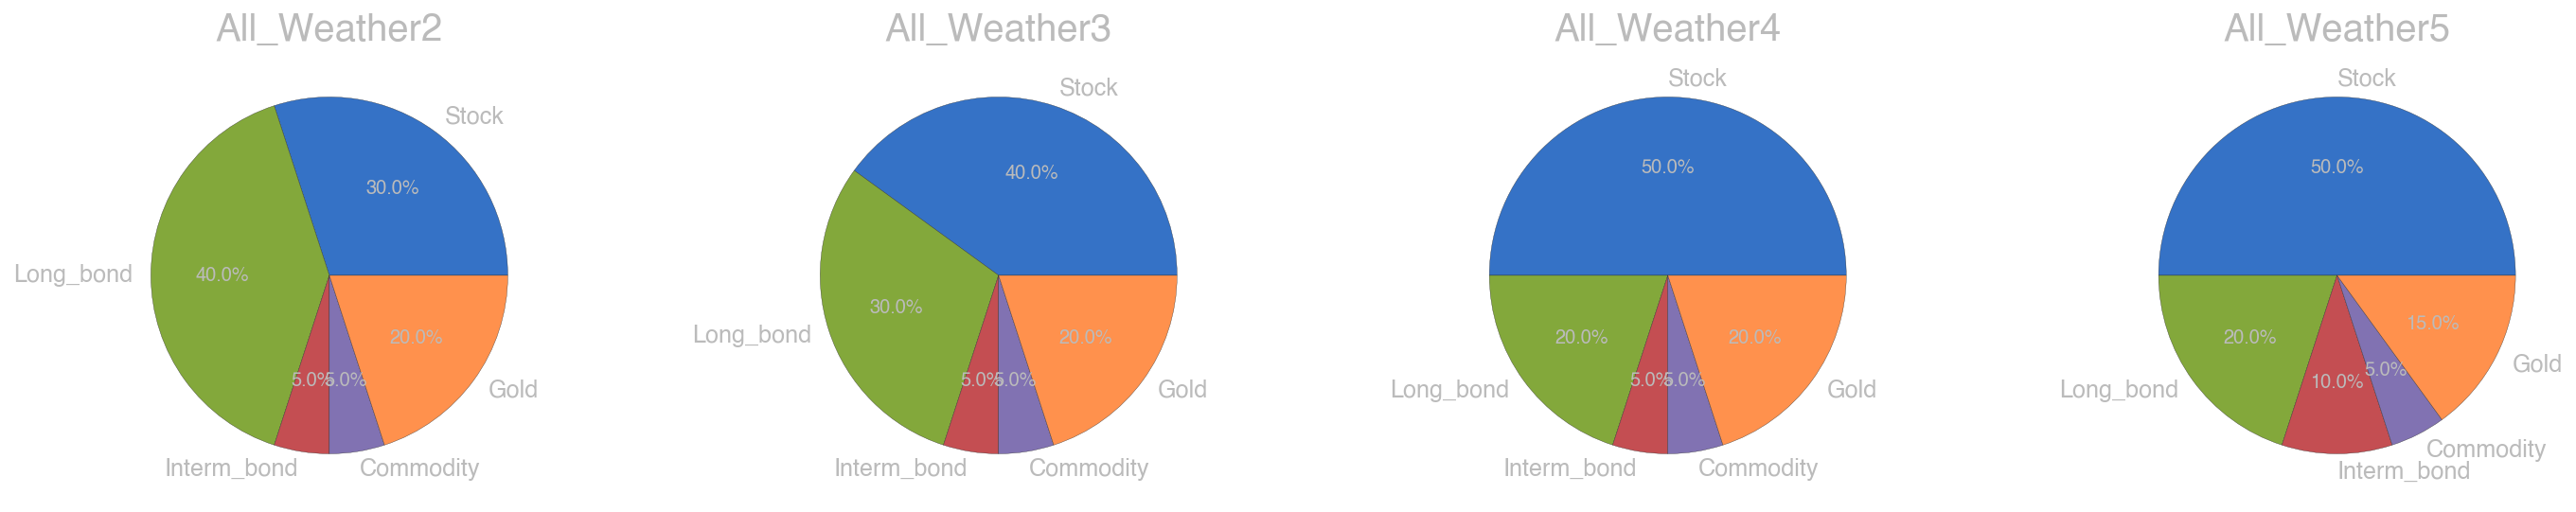

In [109]:
# increase the weight of the assets which are highly correlated with SP_500(stock)

# all_weather2 : interm(-0.1), commodity(-0.025), gold(+0.125)
all_weather2 = [0.3, 0.4, 0.05, 0.05, 0.2]
# all_weather3 : long(-0.1), interm(-0.1), commodity(-0.025), sp(+0.1), gold(+0.125)
all_weather3 = [0.4, 0.3, 0.05, 0.05, 0.2]
# all_weather4 : long(-0.2), interm(-0.1), commodity(-0.025), sp(+0.2), gold(+0.125)
all_weather4 = [0.5, 0.2, 0.05, 0.05, 0.2]
# all_weather5 : long(-0.2), interm(-0.1), commodity(-0.025), sp(+0.2), gold(0.075)
all_weather5 = [0.5, 0.2, 0.1, 0.05, 0.15]

# pie graph for the new all weather portfolio

plt.figure(figsize=(20, 8))

plt.subplot(141)
plt.pie(all_weather2, labels=equity_names, autopct='%0.1f%%')
plt.title('All_Weather2', fontsize=20)

plt.subplot(142)
plt.pie(all_weather3, labels=equity_names, autopct='%0.1f%%')
plt.title('All_Weather3', fontsize=20)

plt.subplot(143)
plt.pie(all_weather4, labels=equity_names, autopct='%0.1f%%')
plt.title('All_Weather4', fontsize=20)

plt.subplot(144)
plt.pie(all_weather5, labels=equity_names, autopct='%0.1f%%')
plt.title('All_Weather5', fontsize=20)


plt.subplots_adjust(top=1, bottom=0.1, left=0.1,
                    right=1, hspace=0.5, wspace=0.5)

In [110]:
# rwr analysis

df_all_weather2 = pd.DataFrame(
    {"All_Weather2": get_port_return(*all_weather2)})
df_all_weather3 = pd.DataFrame(
    {"All_Weather3": get_port_return(*all_weather3)})
df_all_weather4 = pd.DataFrame(
    {"All_Weather4": get_port_return(*all_weather4)})
df_all_weather5 = pd.DataFrame(
    {"All_Weather5": get_port_return(*all_weather5)})

port_df = pd.DataFrame({"Stock100": df_stock100["Stock100"],
                        "S6_B4": df_s6_b4["S6_B4"],
                        "All_Weather": df_all_weather["All_Weather"],
                        "All_Weather2": df_all_weather2["All_Weather2"],
                        "All_Weather3": df_all_weather3["All_Weather3"],
                        "All_Weather4": df_all_weather4["All_Weather4"],
                        "All_Weather5": df_all_weather5["All_Weather5"]
                        })
port_df.tail(2)

,Stock100,S6_B4,All_Weather,All_Weather2,All_Weather3,All_Weather4,All_Weather5
Date,,,,,,,
2020-06-22,-0.028631,-0.010731,-0.002925,-0.000436,-0.004911,-0.009386,-0.010074
2020-06-29,0.040199,0.023104,0.015072,0.014531,0.018804,0.023078,0.022838


In [111]:
# rcr

df_cul_all_weather2 = pd.DataFrame(
    {"All_Weather2": get_port_cumul_return(*all_weather2)})
df_cul_all_weather3 = pd.DataFrame(
    {"All_Weather3": get_port_cumul_return(*all_weather3)})
df_cul_all_weather4 = pd.DataFrame(
    {"All_Weather4": get_port_cumul_return(*all_weather4)})
df_cul_all_weather5 = pd.DataFrame(
    {"All_Weather5": get_port_cumul_return(*all_weather5)})

port_cul_df = pd.DataFrame({"Stock100": df_cul_stock100["Stock100"],
                            "S6_B4": df_cul_s6_b4["S6_B4"],
                            "All_Weather": df_cul_all_weather["All_Weather"],
                            "All_Weather2": df_cul_all_weather2["All_Weather2"],
                            "All_Weather3": df_cul_all_weather3["All_Weather3"],
                            "All_Weather4": df_cul_all_weather4["All_Weather4"],
                            "All_Weather5": df_cul_all_weather5["All_Weather5"]
                            })
port_cul_df.tail(2)

,Stock100,S6_B4,All_Weather,All_Weather2,All_Weather3,All_Weather4,All_Weather5
Date,,,,,,,
2020-06-22,3.576920,2.416077,1.688223,2.111774,2.401985,2.692196,2.519539
2020-06-29,3.760906,2.524769,1.749160,2.174108,2.483142,2.792176,2.618261


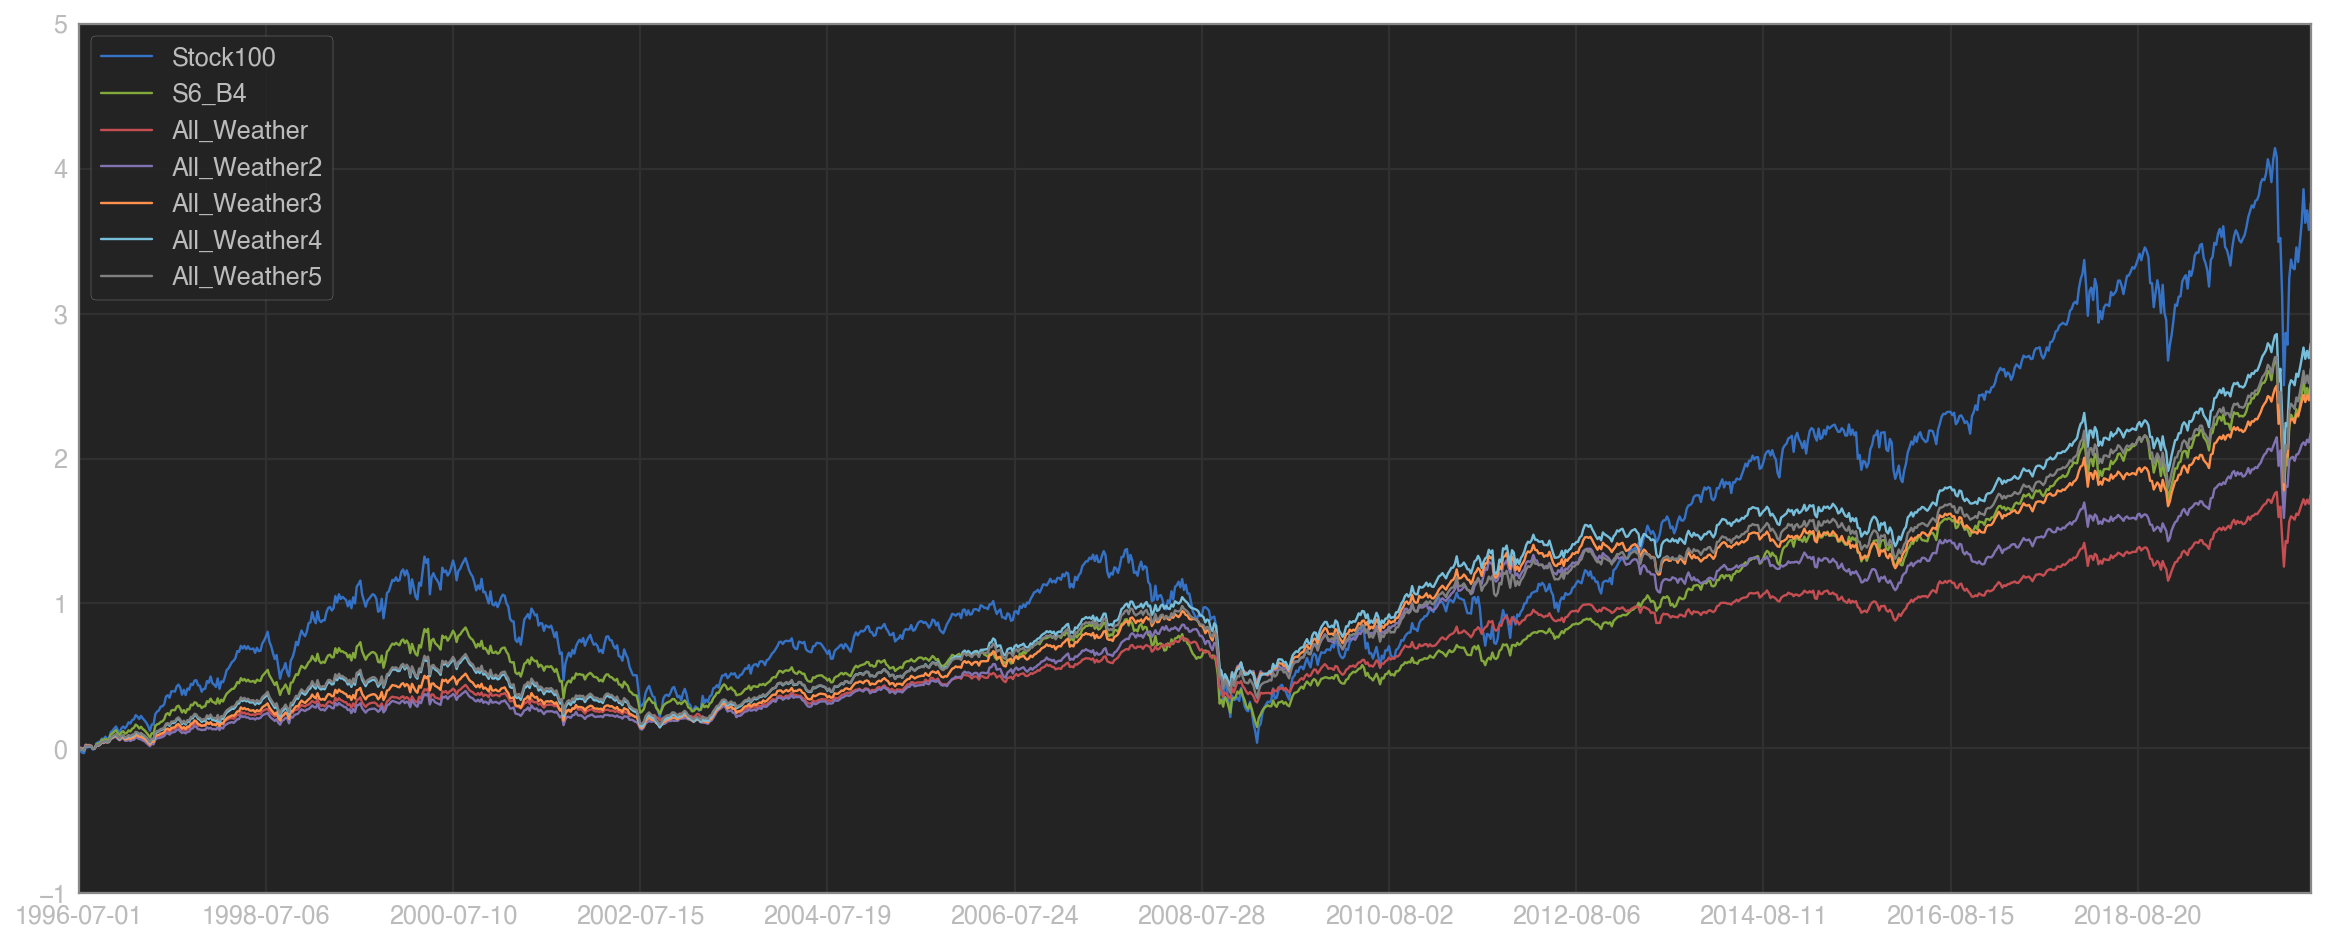

In [112]:
# crr's trend of New all_weather portfolio 

plt.figure(figsize=(20, 8))

plt.plot(port_cul_df.index, port_cul_df.Stock100, label="Stock100")
plt.plot(port_cul_df.index, port_cul_df.S6_B4, label="S6_B4")
plt.plot(port_cul_df.index, port_cul_df.All_Weather, label="All_Weather")
plt.plot(port_cul_df.index, port_cul_df.All_Weather2, label="All_Weather2")
plt.plot(port_cul_df.index, port_cul_df.All_Weather3, label="All_Weather3")
plt.plot(port_cul_df.index, port_cul_df.All_Weather4, label="All_Weather4")
plt.plot(port_cul_df.index, port_cul_df.All_Weather5,
         label="All_Weather5", color='grey')

plt.xticks(cumul_index_df.index[::105])
plt.axis(["1996-07-01", "2020-06-29", -1, 5])

plt.grid(True)
plt.legend()
plt.show()

In [113]:
# cumul_rate, highest peak, worst drop, numbers of negative comparision

data_cumul_rate_2nd = pd.Series({"Stock100": port_cul_df["Stock100"].loc["2020-06-29"],
                                 "S6_B4": port_cul_df["S6_B4"].loc["2020-06-29"],
                                 "All_Weather4": port_cul_df["All_Weather4"].loc["2020-06-29"]})
data_max_2nd = pd.Series({"Stock100": port_df["Stock100"].max(),
                          "S6_B4": port_df["S6_B4"].max(),
                          "All_Weather4": port_df["All_Weather4"].max()})
data_min_2nd = pd.Series({"Stock100": port_df["Stock100"].min(),
                          "S6_B4": port_df["S6_B4"].min(),
                          "All_Weather4": port_df["All_Weather4"].min()})
data_minus_count_2nd = pd.Series({"Stock100": (port_df["Stock100"] < 0).sum(),
                                  "S6_B4": (port_df["S6_B4"] < 0).sum(),
                                  "All_Weather4": (port_df["All_Weather4"] < 0).sum()})

summary_port_df_2nd = pd.DataFrame({"cuml_rate": data_cumul_rate_2nd,
                                    "highest_peak": data_max_2nd,
                                    "worst_drop": data_min_2nd,
                                    "numbers_of_negative": data_minus_count_2nd
                                    })
summary_port_df_2nd

,cuml_rate,highest_peak,worst_drop,numbers_of_negative
Stock100,3.760906,0.121017,-0.181955,548
S6_B4,2.524769,0.086061,-0.120002,561
All_Weather4,2.792176,0.082988,-0.098165,548


**BACKTEST RESULT OF NEW ALL WEATHER**

> - All-weather portfolio 4(stock 50%, long_bond 20%, mid_bond 5%, commodity 5%, gold 20%) records the highest cumulative returns with decreased numbers of negative returns

# RETIREMENT FUND
- to launch a service with the new all weather portfolio

In [114]:
# read etf data

spy_etf = pd.read_csv("./data/SPY.csv")
gld_etf = pd.read_csv("./data/Gld.csv")
dbc_etf = pd.read_csv("./data/DBC.csv")
ief_etf = pd.read_csv("./data/IEF.csv")
tlt_etf = pd.read_csv("./data/TLT.csv")

etf_closes_df = pd.DataFrame({'Date': spy_etf["Date"].copy(),
                              'SP_Close': spy_etf["Close"].copy(),
                              'Long_Close': tlt_etf["Close"].copy(),
                              'Interm_Close': ief_etf["Close"].copy(),
                              'Commodity_Close': dbc_etf["Close"].copy(),
                              'Gold_Close': gld_etf["Close"].copy()}).round(2)

etf_closes_df = etf_closes_df.set_index(
    'Date', drop=True, append=False, verify_integrity=True)
etf_closes_df = etf_closes_df.tail(1)
etf_closes_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
2020-06-29,304.46,164.73,122.09,12.25,166.63


In [116]:
# The fund consists of the sum of ETF assets' price after dividing by 500.
# Prices are based on ratio of the New all weather portfolio.

etf_closes_df["fund"] = (etf_closes_df["SP_Close"].iloc[0]*50 +
                           etf_closes_df["Long_Close"].iloc[0]*20 +
                           etf_closes_df["Interm_Close"].iloc[0]*5 +
                           etf_closes_df["Commodity_Close"].iloc[0]*5 +
                           etf_closes_df["Gold_Close"].iloc[0]*20
                           )/500

etf_closes_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close,fund
Date,,,,,,
2020-06-29,304.46,164.73,122.09,12.25,166.63,45.0438


## EXPECTED RATE OF RETURN AND RISKS OF RETIREMENT FUND

### Perfomance Metrics
- average log rate of return

In [117]:
# weekly log return by assets
logret_df = np.log(closes_df/closes_df.shift(1))
logret_df.columns = ["SP_Close", "Long_Close", "Interm_Close", "Commodity_Close",
                     "Gold_Close"]

# weekly average log return by assets
week_mprofit = logret_df.mean()
week_mprofit

# yearly average log return by assets
# trading day : 252 일 / 5 = 50.4 weeks
# to vector
year_mprofit = week_mprofit * 52
year_mprofit = round(year_mprofit*100, 4)
year_mprofit

SP_Close           6.4811
Long_Close         2.1313
Interm_Close       0.7833
Commodity_Close    1.9552
Gold_Close         6.4151
dtype: float64

In [118]:
# year_mprofit for stock100% 
stock = np.array([1, 0, 0, 0, 0])
stock_return_rate = stock.dot(year_mprofit)
stock_return_rate = round(stock_return_rate, 2)
stock_return_rate

6.48

In [119]:
# year_mprofit for stock 60% + long_bond 40%
s6_b4 = np.array([0.6, 0.4, 0, 0, 0])
s6_b4_rate = s6_b4.dot(year_mprofit)
s6_b4_rate = round(s6_b4_rate, 2)
s6_b4_rate

4.74

In [120]:
# year_mprofit for new all weather portfolio 4

# weights by the assets
retirement_fund = np.array([0.5, 0.2, 0.05, 0.005, 0.2])

retirement_fund_return_rate = retirement_fund.dot(year_mprofit)
retirement_fund_return_rate = round(retirement_fund_return_rate, 2)

retirement_fund_return_rate

5.0

### Risk(Volatility)
1. Standard Deviation
    - calcualtion of standard deviation to see the possibility if the portfolio can achieve expected rate of return
2. Sharpe Ratio
    - ('return of portfolio' - 'risk-free rate') / (standard deviation of the portfolio’s excess return)
    - assumed 'risk-free rate' as 1% interest of Kakao bank saving.

In [121]:
# Standard Deviation

logret_df.cov()
cov_mat = logret_df.cov()*52

cov_mat = cov_mat.values

stock_return_rate_var = np.dot(np.dot(stock, cov_mat), stock.T)
stock_return_rate_risk = np.sqrt(stock_return_rate_var)
s6_b4_rate_var = np.dot(np.dot(s6_b4, cov_mat), s6_b4.T)
s6_b4_risk = np.sqrt(s6_b4_rate_var)
retirement_fund_return_rate_var = np.dot(
    np.dot(retirement_fund, cov_mat), retirement_fund.T)
retirement_fund_return_rate_risk = np.sqrt(retirement_fund_return_rate_var)

print("stock 100% portfolio risk : ", round(stock_return_rate_risk, 4))
print("s6_b4 portfolio risk : ", round(s6_b4_risk, 4))
print("new all weather portfolio risk : ", round(retirement_fund_return_rate_risk, 4))

stock 100% portfolio risk :  0.1812
s6_b4 portfolio risk :  0.1064
new all weather portfolio risk :  0.0967


In [122]:
# Sharpe Ratio

risk_free_rate = 1/100


sharpe_ratio_1 = (stock_return_rate/100-risk_free_rate) / stock_return_rate_risk
sharpe_ratio_2 = (s6_b4_rate/100-risk_free_rate) / stock_return_rate_risk
sharpe_ratio_3 = (retirement_fund_return_rate/100-risk_free_rate) / stock_return_rate_risk

print("stock 100% portfolio Sharpe Ratio : ", round(sharpe_ratio_1, 4))
print("s6_b4 portfolio Sharpe Ratio : ", round(sharpe_ratio_2, 4))
print("new all weather portfolio Sharpe Ratio : ", round(sharpe_ratio_3, 4))

stock 100% portfolio Sharpe Ratio :  0.3024
s6_b4 portfolio Sharpe Ratio :  0.2064
new all weather portfolio Sharpe Ratio :  0.2207


In [123]:
# expected rate of return, Standard Deviation and Sharpe Ratio of retirement fund

ls = [retirement_fund_return_rate/100,round(retirement_fund_return_rate_risk, 4),
      round(sharpe_ratio_3, 4)]

final = pd.DataFrame(index=['Retirement Fund'], columns=['expected_rate_of_return', 'Standard_Deviation','Sharpe Ratio'])
final = final.append(pd.Series(ls, index=final.columns), ignore_index=True)
final = final.dropna()
final

,expected_rate_of_return,Standard_Deviation,Sharpe Ratio
1,0.05,0.0967,0.2207


# Conclusion
- what would the expected return if a person who start to invest our retirement fund from 30-year old to 59-year old? 
- assumption
>    1. buying once a year by price on last week of every June
>    2. setting up the exchange ratio as 1,100 won to 1 dollar
>    3. 4,000,000 wons - 3,637 dollars
>    4. impossible to buy more funds over 4,000,000 wons, and ignore the rest of investment money
>    5. ignore dividend of ETF

In [124]:
etf_fund_df = etf_closes_df["fund"]

for i in range(0, 29):
    new_price = etf_fund_df.iloc[i]*(1 + retirement_fund_return_rate/100)
    etf_fund_df = etf_fund_df.append(pd.Series(new_price),
                                     ignore_index=True, verify_integrity=True)

year = list(range(2020, 2050))
etf_fund_df = pd.DataFrame(etf_fund_df)
etf_fund_df = etf_fund_df.rename({0: "Future_Price"}, axis=1)
etf_fund_df["year"] = year
etf_fund_df = round(etf_fund_df.set_index("year"), 2)
etf_fund_df.head()

,Future_Price
year,
2020,45.04
2021,47.30
2022,49.66
2023,52.14
2024,54.75


In [125]:
# add the numbers of funds and total fund price that investor can buy annually with $ 3,637

etf_fund_df["invest_money"] = 3637
etf_fund_df["buying_nums"] = np.trunc(
    etf_fund_df["invest_money"] / etf_fund_df["Future_Price"])
etf_fund_df["total_return"] = etf_fund_df["Future_Price"] * \
    etf_fund_df["buying_nums"]
etf_fund_df.head()

,Future_Price,invest_money,buying_nums,total_return
year,,,,
2020,45.04,3637,80.0,3603.20
2021,47.30,3637,76.0,3594.80
2022,49.66,3637,73.0,3625.18
2023,52.14,3637,69.0,3597.66
2024,54.75,3637,66.0,3613.50


In [126]:
# expected rate of return

result = etf_fund_df["Future_Price"].iloc[0] *\
    ((1 + retirement_fund_return_rate/100)**31) * \
    etf_fund_df["buying_nums"].sum()
result

262849.7822640342

In [127]:
# Kakao Bank Saving (1% interest) = risk_free_rate
save = 3637*30*(1.01**31)
save

148534.43310349312

In [128]:
# comparison of expected rate of return and risk metrics between retirement and Kakao saving

result_df = pd.DataFrame([result])
save_df = pd.DataFrame([save])


result_df = result_df.rename({0: "result_fund"}, axis=1)
save_df = save_df.rename({0: "result_save"}, axis=1)

return_result_df = pd.concat([result_df, save_df], axis=1)
return_result_df["result"] = 2050.07

return_result_df.set_index("result", inplace=True)

return_result_df.round(2)

,result_fund,result_save
result,,
2050.07,262849.78,148534.43


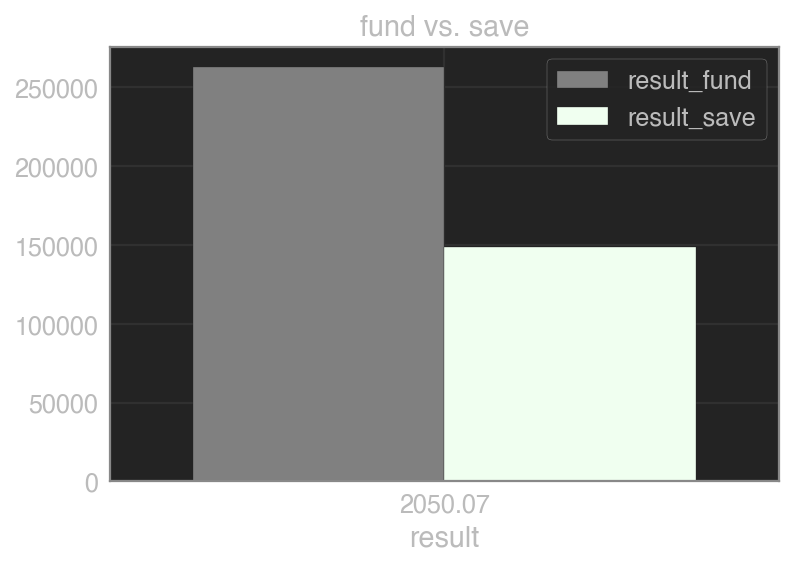

In [129]:
ax = return_result_df.plot(kind='bar', width=1.5, title="fund vs. save",
                           rot=0, color=['grey', 'honeydew'])
plt.show()